In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline

In this CSV there are 27 features and 1 target. 

Features:

    PID
    Unique county identifier.

    county
    County name.

    state
    State to which county belongs to.

    area
    Area of county (units unknown).

    poptotal
    Total population.

    popdensity
    Population density (person/unit area).

    popwhite
    Number of whites.

    popblack
    Number of blacks.

    popamerindian
    Number of American Indians.

    popasian
    Number of Asians.

    popother
    Number of other races.

    percwhite
    Percent white.

    percblack
    Percent black.

    percamerindan
    Percent American Indian.

    percasian
    Percent Asian.

    percother
    Percent other races.

    popadults
    Number of adults.

    perchsd
    Percent with high school diploma.

    percollege
    Percent college educated.

    percprof
    Percent with professional degree.

    poppovertyknown
    Population with known poverty status.

    percpovertyknown
    Percent of population with known poverty status.

    percbelowpoverty
    Percent of people below poverty line.

    percchildbelowpovert
    Percent of children below poverty line.

    percadultpoverty
    Percent of adults below poverty line.

    percelderlypoverty
    Percent of elderly below poverty line.

    inmetro
    County considered in a metro area.

    category
    Miscellaneous.
    
    
Target:
     
    poptotal
    Total population.
     
    

Within the follwing cell, we are retrieving data from the CSV file in order for it to rendered into our program. Variable name used is short for dataframe. 


In [2]:
df = pd.read_csv('midwest.csv', index_col = 0)

With the .head() function we are retrieving the top 5 elements as a default in the CSV.
As you can see there is a parameter of 15 included which just retrieves the top 15 elements. 

In [3]:
df.head(15)


,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
1,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR
2,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR
3,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR
4,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,17.278954,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU
5,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,14.475999,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR
6,566,BUREAU,IL,0.050,35688,713.760000,35157,50,65,195,...,18.904624,3.275891,35107,98.372002,10.399635,14.158819,8.179287,11.008586,0,AAR
7,567,CALHOUN,IL,0.017,5322,313.058824,5298,1,8,15,...,11.917388,3.209601,5241,98.478016,15.149781,13.787761,12.932331,21.085271,0,LAR
8,568,CARROLL,IL,0.027,16805,622.407407,16519,111,30,61,...,16.197121,3.055727,16455,97.917287,11.710726,17.225462,10.027037,9.525052,0,AAR
9,569,CASS,IL,0.024,13437,559.875000,13384,16,8,23,...,14.107649,3.206799,13081,97.350599,13.875086,17.994784,11.914343,13.660180,0,AAR
10,570,CHAMPAIGN,IL,0.058,173025,2983.189660,146506,16559,331,8033,...,41.295808,17.757448,154934,89.544286,15.572437,14.132234,17.562728,8.105017,1,HAU


This segment of code is performing statistical data in the background that provides us with correlation data to represent the best correlated data in reference to our target column carat.

This code is also styleed to produce a color coded grid. Highly correlated data is represented by warmer colors while low correlation is represented by cooler colors. 


In [4]:
df.corr().style.background_gradient(cmap='coolwarm')

,PID,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,popother,percwhite,percblack,percamerindan,percasian,percother,popadults,perchsd,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro
PID,1.000000,0.308624,-0.008837,0.020415,0.004556,-0.029536,0.109128,-0.041197,-0.049529,-0.009081,-0.102180,0.140716,0.020344,-0.073881,-0.008628,0.096081,0.071355,-0.108175,-0.008794,0.069161,0.013908,0.037013,0.017590,-0.104274,0.006239
area,0.308624,1.000000,0.066955,-0.058973,0.066902,0.053186,0.187906,0.081312,0.077388,-0.047494,-0.046474,0.107158,0.118808,0.017463,0.066193,0.146746,0.150263,0.025285,0.066218,-0.113975,0.072816,0.051729,0.101553,-0.007789,-0.105649
poptotal,-0.008837,0.066955,1.000000,0.897836,0.989118,0.946895,0.815136,0.923090,0.857830,-0.475274,0.553147,-0.031489,0.450837,0.462256,0.999769,0.137451,0.301109,0.276478,0.999964,0.035437,-0.028696,0.026116,-0.030970,-0.149169,0.308369
popdensity,0.020415,-0.058973,0.897836,1.000000,0.917822,0.823125,0.797376,0.725698,0.613738,-0.520509,0.631158,-0.041441,0.466985,0.408504,0.896993,0.172413,0.350164,0.318589,0.897265,0.050168,-0.052115,0.021492,-0.056229,-0.201871,0.387887
popwhite,0.004556,0.066902,0.989118,0.917822,1.000000,0.893851,0.810612,0.894575,0.806030,-0.481253,0.562461,-0.040134,0.502161,0.464084,0.988959,0.190873,0.365205,0.329787,0.988761,0.033842,-0.064932,-0.008098,-0.060906,-0.202137,0.366842
popblack,-0.029536,0.053186,0.946895,0.823125,0.893851,1.000000,0.785377,0.863591,0.838235,-0.461054,0.548079,-0.015642,0.302951,0.398073,0.945835,0.017860,0.151958,0.150760,0.947561,0.040503,0.055068,0.107039,0.038056,-0.031178,0.184506
popamerindian,0.109128,0.187906,0.815136,0.797376,0.810612,0.785377,1.000000,0.683586,0.614272,-0.612570,0.516515,0.252792,0.381868,0.360858,0.811962,0.141199,0.282675,0.225080,0.814757,-0.002656,0.096994,0.150048,0.091724,-0.115944,0.264759
popasian,-0.041197,0.081312,0.923090,0.725698,0.894575,0.863591,0.683586,1.000000,0.963332,-0.332440,0.345450,-0.015599,0.443617,0.446535,0.924525,0.090857,0.237090,0.232324,0.923103,0.011252,-0.012933,0.012786,-0.010445,-0.082950,0.173316
popother,-0.049529,0.077388,0.857830,0.613738,0.806030,0.838235,0.614272,0.963332,1.000000,-0.284284,0.286991,-0.010282,0.292587,0.481900,0.859761,0.020178,0.117045,0.113596,0.858289,0.026361,0.007215,0.038036,-0.001433,-0.035549,0.111082
percwhite,-0.009081,-0.047494,-0.475274,-0.520509,-0.481253,-0.461054,-0.612570,-0.332440,-0.284284,1.000000,-0.759585,-0.595200,-0.319084,-0.341522,-0.471139,-0.018609,-0.214739,-0.221268,-0.473703,0.125245,-0.376588,-0.412731,-0.349611,-0.042927,-0.263975


Keeping only popdensity, popwhite, popwhite, popblack, popamerindian, popasian, popother, popadults, poptotal due to high correlation


In [5]:

X = df[['popdensity','popwhite','popblack','popamerindian','popasian','popother','popadults','poptotal']]

y = df.poppovertyknown

Pairplot of this dataframe

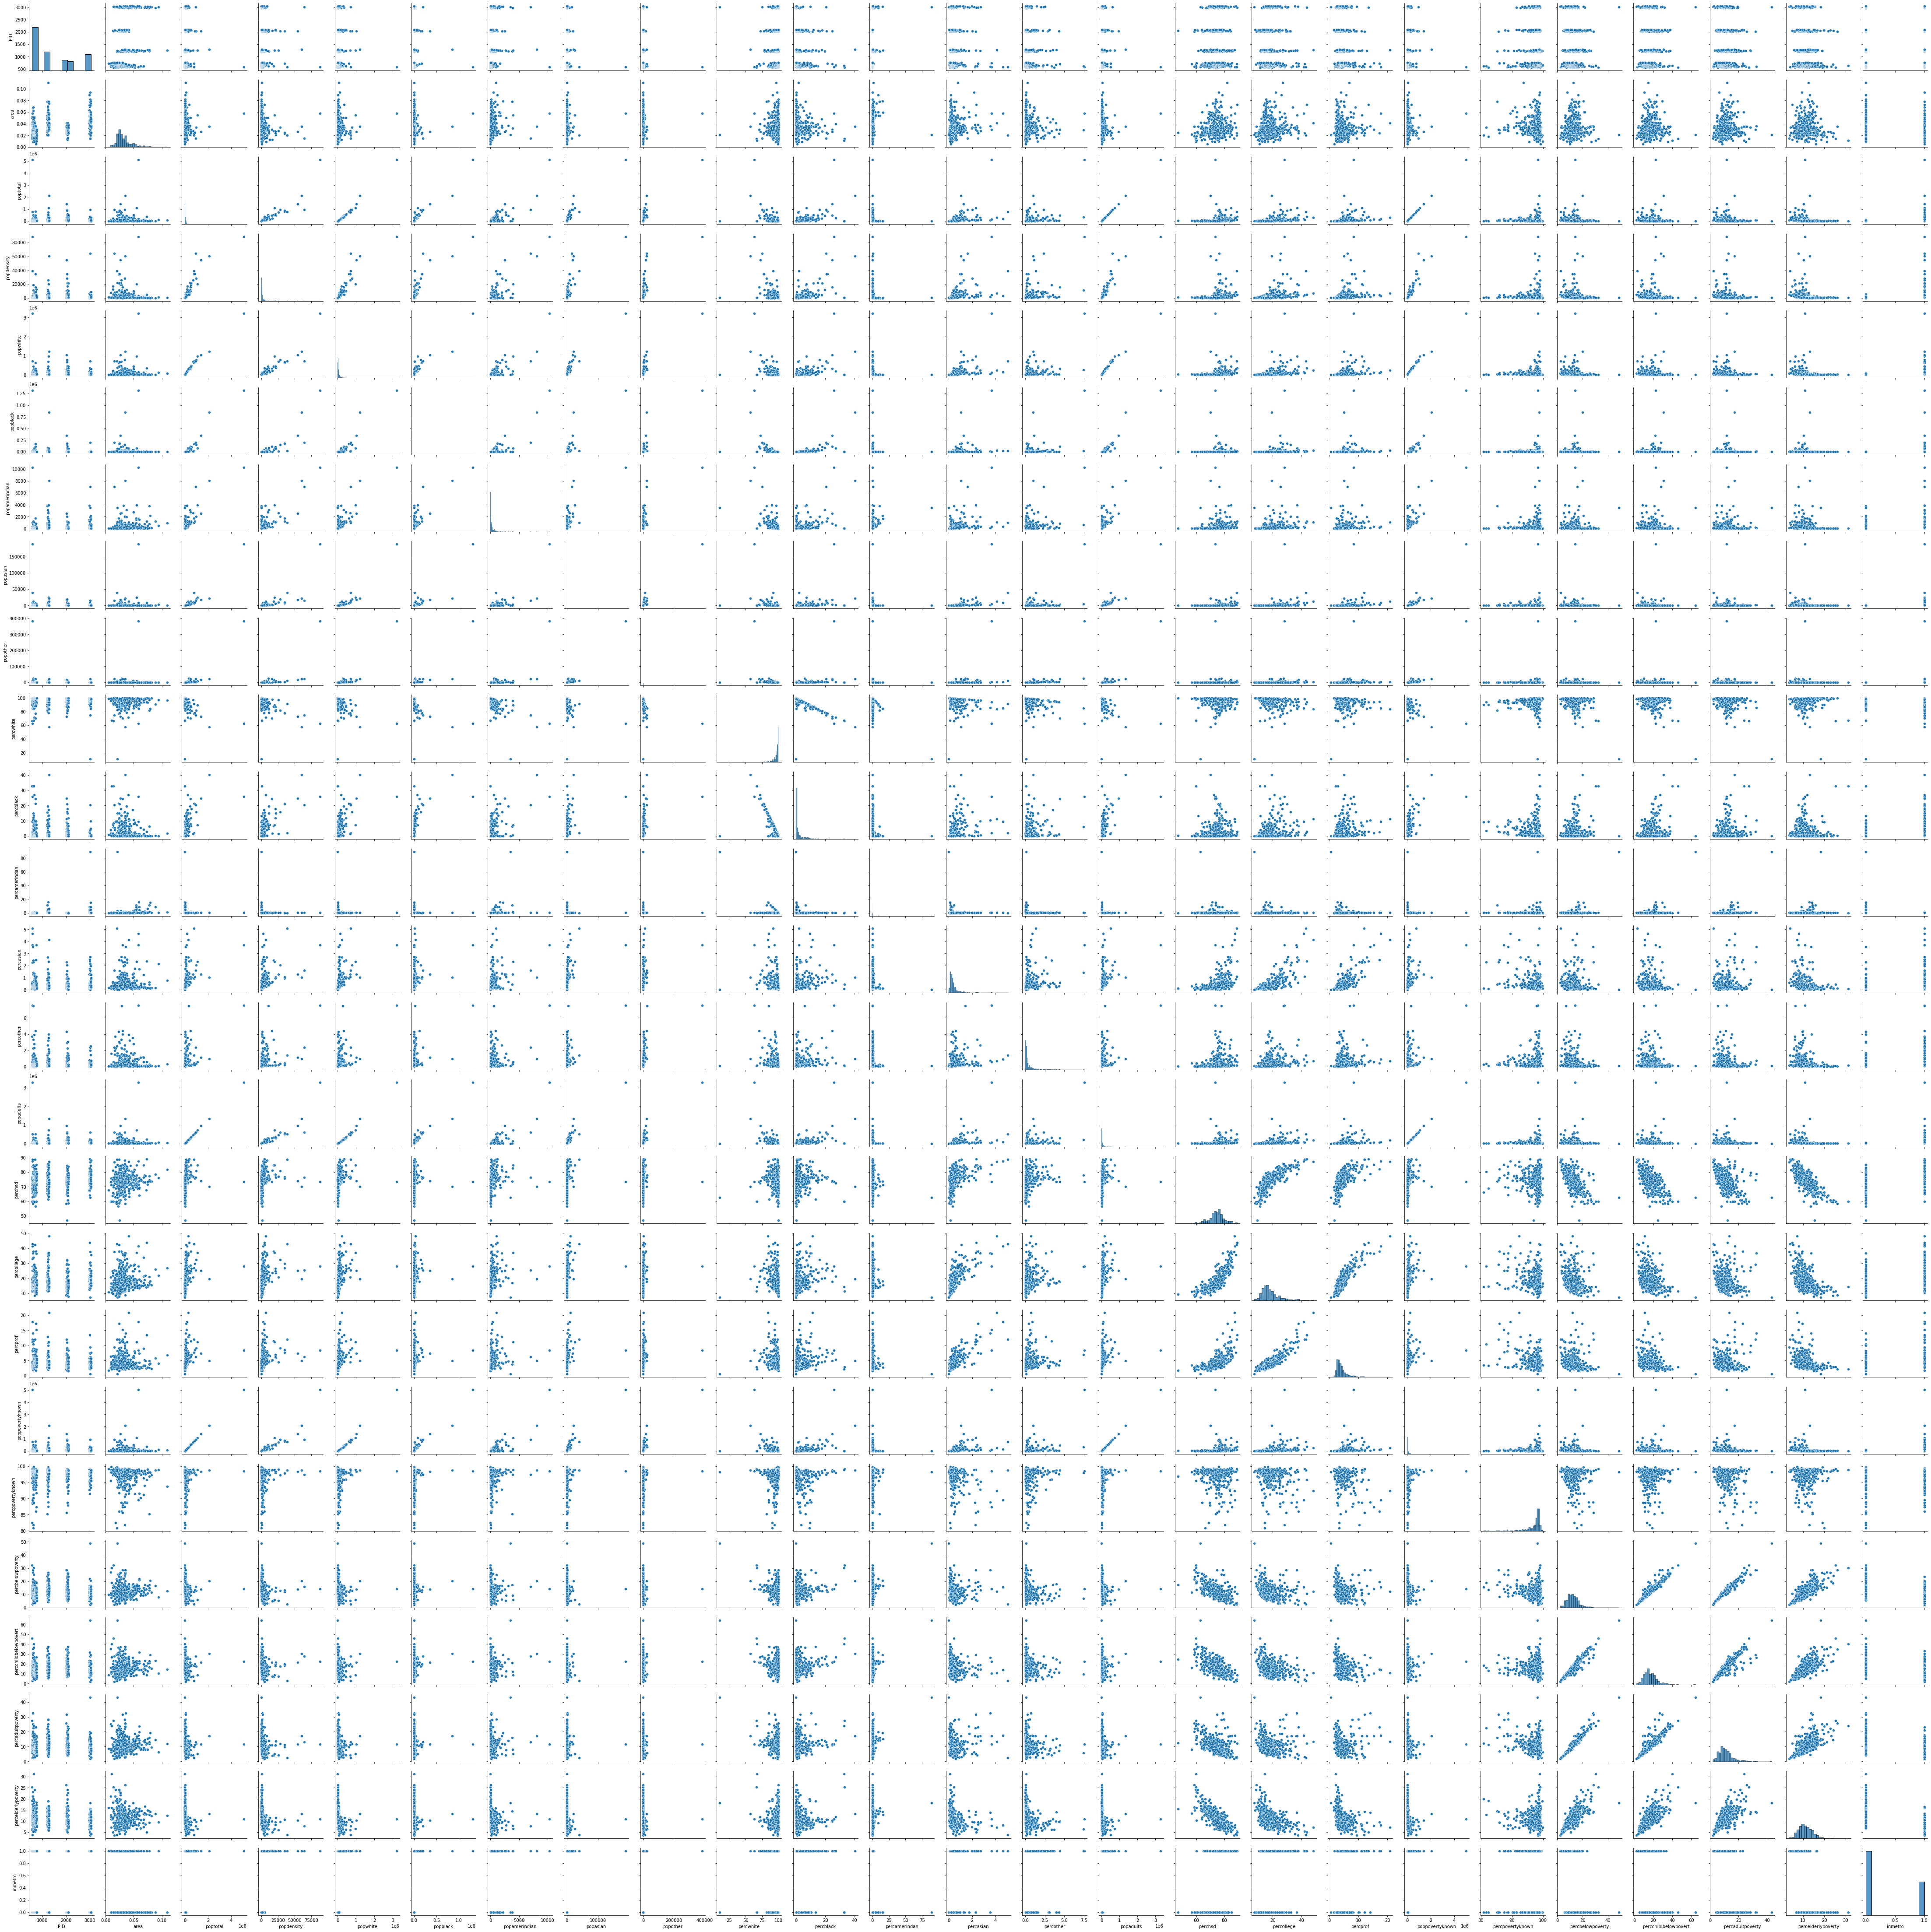

In [6]:
sns.pairplot(df)

Prepping the data to be split between test and train data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Creates the KNN Regression model and fits the trained data to the model

In [8]:
reg = KNeighborsRegressor(n_neighbors=2)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

Creates the score based on number of nearest neighbors and outputs the score 

In [9]:
score_knn = reg.score(X_test, y_test)
score_knn

0.9899023288989036

Produces predictions for this specific dataframe that allows us to determine if our model is good or bad. Based on this diagram of TrueValue, Prediction and Error, we can see that this is a good model because of the TrueValue and Prediction being very close in value with little error. This is because of the highly correlated features that we included into this model. 

In [10]:
predictions = reg.predict(X_test)
performance = pd.DataFrame({ 'True Value': y_test,
                            'Prediction': predictions,
                            'Error': y_test - predictions})
performance.head(10)

,True Value,Prediction,Error
327,260264,263161.5,-2897.5
265,13627,13434.5,192.5
203,110453,108168.0,2285.0
27,13860,14098.0,-238.0
120,111645,111776.5,-131.5
98,58927,56986.5,1940.5
382,32837,32537.5,299.5
334,561952,471888.0,90064.0
354,506100,471888.0,34212.0
378,351558,324093.0,27465.0


In [11]:
print("Score: ", reg.score(X_test, y_test).round(3))

Score:  0.99


PREDICTIONS:

    The cells below are 5 predictions made based on this dataframe with the following features:
    
    population density, population of white race, population of black, population of american indian, population of asian race, population of other races that are not mentioned in the CSV, population of adults, and population total
    
    The target data we are trying to predict is the number of known people that are considered to be in poverty. listed as (poppovertyknown) in the CSV. 
    
    Based on the features above we use there values as background info to come up with our predictions by making a new array for them and inputting values for those features. 
    
    

Prediction #1 is for population density(700), population of white race(8900), population of black(1900), population of american indian(100), population of asian race(500), population of other races that are not mentioned(350), population of adults(300000), and population total(1500000)

Using in the dataset: [700,8900,1900,100,500,350,30000,150000]

In [12]:
# popdensity, popwhite, popblack, popamerindian, popasian, popother, popadults,poptotal
X_new = [[700,8900,1900,100,500,350,30000,150000]]
prediction = reg.predict(X_new)
prediction

/Users/traivius.c/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([72266.5])

Prediction #2 is for population density(500), population of white race(5000), population of black(750), population of american indian(200), population of asian race(350), population of other races that are not mentioned(450), population of adults(220000), and population total(30000)

Using in the dataset: [500,5000,750,200,350,450,22000,30000]

In [13]:
# popdensity, popwhite, popblack, popamerindian, popasian, popother, popadults, poptotal
X_new = [[500,5000,750,200,350,450,22000,30000]]
prediction = reg.predict(X_new)
prediction

/Users/traivius.c/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([18524.])

Prediction #3 is for population density(3000), population of white race(13000), population of black(11250), population of american indian(1000), population of asian race(100), population of other races that are not mentioned(725), population of adults(34000), and population total(102500)

Using in the dataset: [3000,13000,11250,1000,100,725,34000,102500]

In [14]:
# popdensity, popwhite, popblack, popamerindian, popasian, popother, popadults, poptotal
X_new = [[3000,13000,11250,1000,100,725,34000,102500]]
prediction = reg.predict(X_new)
prediction

/Users/traivius.c/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([52962.5])

Prediction #4 is for population density(5500), population of white race(3500), population of black(15000), population of american indian(5000), population of asian race(1200), population of other races that are not mentioned(1500), population of adults(10000), and population total(500000)

Using in the dataset: [5500,3500,15000,5000,1200,1500,10000,500000]

In [15]:
# popdensity, popwhite, popblack, popamerindian, popasian, popother, popadults, poptotal
X_new = [[5500,3500,15000,5000,1200,1500,10000,500000]]
prediction = reg.predict(X_new)
prediction

/Users/traivius.c/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([235025.5])

Prediction #5 is for population density(430), population of white race(200), population of black(4000), population of american indian(1700), population of asian race(45000), population of other races that are not mentioned(800), population of adults(13000), and population total(67000)

Using in the dataset: [430,200,4000,1700,4500,800,13000,67000]

In [16]:
# popdensity, popwhite, popblack, popamerindian, popasian, popother, popadults, poptotal
X_new = [[430,200,4000,1700,4500,800,13000,67000]]
prediction = reg.predict(X_new)
prediction

/Users/traivius.c/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([31794.5])

The following cells of code are used to produce a plot to show the best # of nearest neighbors for the highest score possible. Based on this plot's output, the smaller the number of nearest neighbors the higher the score for the model. Oddly, the highest score is at index 0 of nearest neighbors. 

In [17]:
x1 = []
y1 = []
score = 0.0
for i in range(1,25):
    x1.append(i)
    reg1 = KNeighborsRegressor(n_neighbors=i)
    reg1.fit(X_train, y_train)
    score = reg1.score(X_test, y_test).round(3)
    # print(f'Score with {i} nearest neighbors: {score:.3f}')
    y1.append(score)

In [18]:
high = y1[0]
high_index = 0
for i in range(1, len(y1)):
    if y1[i] > high:
        high = y1[i]
        high_index = i
print(f'Highest k score: {high}')
print(f'...at k-value: {high_index}')

Highest k score: 0.994
...at k-value: 0


In [ ]:
import matplotlib.pyplot as plt
plt.plot(x1, y1)
plt.xlabel('nearest neighbors')
plt.ylabel('score')
plt.title('KNN Scores by k')
plt.show()